# Train and test AVIDNet

In [1]:
import torch
import os
from torchsummary import summary
from collections import defaultdict

from datasets.utils import get_data_transforms, separate_datasets, get_data_loaders, show_samples
from models.model import get_model
from models.train import train_model
from models.metrics import update_mean_metrics, print_metrics

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Load data

In [3]:
fold = 5
labeled_num_per_cls, mu = 25, 4
batch_size = 6
data_dir = 'data/CXR/train-test'
lb_partial_dir = 'train_lb/train_lb_'
dataset_types = ['train', 'test'] # ['train', 'val', 'test']

In [4]:
# separate_datasets(data_dir, fold, labeled_num_per_cls, mu)

{'train_lb': 75, 'train_ulb': 300, 'train_ulb_wa': 300, 'test': 1578}


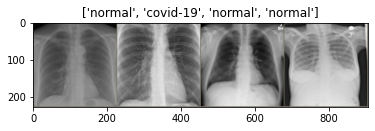

In [5]:
data_transforms = get_data_transforms(purpose='fixmatch')
data_loaders, dataset_sizes, class_names = get_data_loaders(data_transforms, fold, batch_size, dataset_types,
                                                            data_dir, lb_partial_dir, purpose='fixmatch', mu=mu)
print(dataset_sizes)
show_samples(data_loaders, class_names, dataset_type='train_lb')

## Train the model

In [6]:
trained_models = []
cls_names = ['All', 'COVID-19', 'Pneumonia', 'Normal']
metric_types = ['acc'] # metric_types = ['acc', 'ppv', 'recall', 'f1']
mean_metrics = {m_type: defaultdict(float) for m_type in metric_types}
for i in range(fold):
    model_ft, criterion, optimizer_ft, exp_lr_scheduler = get_model(device, fine_tuning=False)
    model, metrics = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, i, cls_names,
                                 metric_types, dataset_types, data_loaders, dataset_sizes, device, num_epochs=20,
                                 lambda_u=1.0, threshold=0.95, purpose='fixmatch')
    trained_models.append(model)
    mean_metrics = update_mean_metrics(cls_names, mean_metrics, metrics, status='training')

mean_metrics = update_mean_metrics(cls_names, mean_metrics, status='final', fold=fold)
print_metrics(mean_metrics, cls_names, phase='Mean results')

--------------------
Model 1
--------------------

Epoch 0/19
----------
[train]
LOSS - 1.1665
ACC - All: 0.3867  COVID-19: 0.2800  Pneumonia: 0.6400  Normal: 0.2400 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 1.0546
ACC - All: 0.3764  COVID-19: 0.0000  Pneumonia: 0.0000  Normal: 1.0000 

Validation loss decreased (inf --> 1.054606).

Epoch 1/19
----------
[train]
LOSS - 1.0521
ACC - All: 0.4667  COVID-19: 0.7600  Pneumonia: 0.3600  Normal: 0.2800 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.7072
ACC - All: 0.7465  COVID-19: 0.0101  Pneumonia: 0.7559  Normal: 0.8552 

Validation loss decreased (1.054606 --> 0.707177).

Epoch 2/19
----------
[train]
LOSS - 0.8206
ACC - All: 0.7067  COVID-19: 0.6400  Pneumonia: 0.6800  Normal: 0.8000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.7456
ACC - All: 0.7180  COVID-19: 0.5960  Pneumonia: 0.9808  Normal: 0.3468 

EarlyStopping counter: 1 out of 5

Epoch 3/19
----------
[train]
LOSS - 0.8734
ACC - All: 0.5333  COVID-19: 0.5200  Pneumonia: 

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/multiprocessing/util.py", line 133, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-giu6vcaj'


[train]
LOSS - 0.5292
ACC - All: 0.8667  COVID-19: 0.9600  Pneumonia: 0.8400  Normal: 0.8000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5174
ACC - All: 0.8283  COVID-19: 0.4141  Pneumonia: 0.9006  Normal: 0.7896 

EarlyStopping counter: 2 out of 5

Epoch 10/19
----------
[train]
LOSS - 0.5920
ACC - All: 0.8267  COVID-19: 0.9200  Pneumonia: 0.7600  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5057
ACC - All: 0.8251  COVID-19: 0.3939  Pneumonia: 0.9299  Normal: 0.7407 

Validation loss decreased (0.512308 --> 0.505659).

Epoch 11/19
----------
[train]
LOSS - 0.6021
ACC - All: 0.8000  COVID-19: 0.8000  Pneumonia: 0.8000  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5217
ACC - All: 0.8283  COVID-19: 0.4949  Pneumonia: 0.8836  Normal: 0.8013 

EarlyStopping counter: 1 out of 5

Epoch 12/19
----------
[train]
LOSS - 0.5492
ACC - All: 0.8000  COVID-19: 0.7200  Pneumonia: 0.9200  Normal: 0.7600 
Mask ratio's range: 0.958333

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/multiprocessing/util.py", line 133, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-477id06q'


[train]
LOSS - 0.4668
ACC - All: 0.8533  COVID-19: 0.8400  Pneumonia: 0.9200  Normal: 0.8000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5032
ACC - All: 0.8200  COVID-19: 0.3838  Pneumonia: 0.9277  Normal: 0.7323 

Validation loss decreased (0.505659 --> 0.503236).

Epoch 16/19
----------
[train]
LOSS - 0.4632
ACC - All: 0.8667  COVID-19: 0.8800  Pneumonia: 0.9600  Normal: 0.7600 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5108
ACC - All: 0.8264  COVID-19: 0.4444  Pneumonia: 0.9164  Normal: 0.7559 

EarlyStopping counter: 1 out of 5

Epoch 17/19
----------
[train]
LOSS - 0.4382
ACC - All: 0.8667  COVID-19: 0.9200  Pneumonia: 0.8800  Normal: 0.8000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5235
ACC - All: 0.8124  COVID-19: 0.4646  Pneumonia: 0.8915  Normal: 0.7525 

EarlyStopping counter: 2 out of 5

Epoch 18/19
----------
[train]
LOSS - 0.4406
ACC - All: 0.8933  COVID-19: 0.9600  Pneumonia: 0.9200  Normal: 0.8000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5067
ACC - 

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/multiprocessing/util.py", line 133, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-ybmp9vbr'


[train]
LOSS - 0.6248
ACC - All: 0.8533  COVID-19: 0.8800  Pneumonia: 0.8000  Normal: 0.8800 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5521
ACC - All: 0.7985  COVID-19: 0.7071  Pneumonia: 0.8452  Normal: 0.7441 

EarlyStopping counter: 5 out of 5

Early stopping!!

--------------------
[Best results]
ACC - All: 0.7985  COVID-19: 0.7071  Pneumonia: 0.8452  Normal: 0.7441 

Training complete in 5m 5s
-------------------- 

--------------------
Model 3
--------------------

Epoch 0/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/multiprocessing/util.py", line 133, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-w006wuei'


[train]
LOSS - 1.1722
ACC - All: 0.2933  COVID-19: 0.1600  Pneumonia: 0.3200  Normal: 0.4000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 1.1793
ACC - All: 0.1008  COVID-19: 0.9293  Pneumonia: 0.0576  Normal: 0.0269 

Validation loss decreased (inf --> 1.179332).

Epoch 1/19
----------
[train]
LOSS - 1.0879
ACC - All: 0.3733  COVID-19: 0.4400  Pneumonia: 0.4800  Normal: 0.2000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 1.1711
ACC - All: 0.3910  COVID-19: 0.2727  Pneumonia: 0.0000  Normal: 0.9933 

Validation loss decreased (1.179332 --> 1.171107).

Epoch 2/19
----------
[train]
LOSS - 0.8818
ACC - All: 0.6133  COVID-19: 0.7200  Pneumonia: 0.6000  Normal: 0.5200 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.8282
ACC - All: 0.5349  COVID-19: 0.2727  Pneumonia: 0.2644  Normal: 0.9815 

Validation loss decreased (1.171107 --> 0.828201).

Epoch 3/19
----------
[train]
LOSS - 0.8450
ACC - All: 0.6133  COVID-19: 0.9200  Pneumonia: 0.4000  Normal: 0.5200 
Mask ratio's range: 1.0 ~ 1.0

[

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/multiprocessing/util.py", line 133, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-5kfv772h'


[train]
LOSS - 0.6414
ACC - All: 0.7867  COVID-19: 0.7200  Pneumonia: 0.8400  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5873
ACC - All: 0.7997  COVID-19: 0.6162  Pneumonia: 0.7797  Normal: 0.8603 

EarlyStopping counter: 2 out of 5

Epoch 6/19
----------
[train]
LOSS - 0.6961
ACC - All: 0.7733  COVID-19: 0.7600  Pneumonia: 0.7600  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5411
ACC - All: 0.8131  COVID-19: 0.6061  Pneumonia: 0.8508  Normal: 0.7912 

Validation loss decreased (0.565306 --> 0.541055).

Epoch 7/19
----------
[train]
LOSS - 0.4700
ACC - All: 0.8533  COVID-19: 0.9600  Pneumonia: 0.7200  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5692
ACC - All: 0.8048  COVID-19: 0.6364  Pneumonia: 0.8147  Normal: 0.8182 

EarlyStopping counter: 1 out of 5

Epoch 8/19
----------
[train]
LOSS - 0.5170
ACC - All: 0.8400  COVID-19: 0.8800  Pneumonia: 0.7600  Normal: 0.8800 
Mask ratio's ran

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/multiprocessing/util.py", line 133, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-lgpv09rj'


[train]
LOSS - 0.5280
ACC - All: 0.8133  COVID-19: 0.8400  Pneumonia: 0.7200  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5434
ACC - All: 0.8131  COVID-19: 0.5960  Pneumonia: 0.8294  Normal: 0.8249 

EarlyStopping counter: 2 out of 5

Epoch 12/19
----------
[train]
LOSS - 0.5692
ACC - All: 0.7467  COVID-19: 0.8800  Pneumonia: 0.6000  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5508
ACC - All: 0.8074  COVID-19: 0.5960  Pneumonia: 0.8136  Normal: 0.8333 

EarlyStopping counter: 3 out of 5

Epoch 13/19
----------
[train]
LOSS - 0.4561
ACC - All: 0.8533  COVID-19: 0.8800  Pneumonia: 0.8800  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5448
ACC - All: 0.8112  COVID-19: 0.5960  Pneumonia: 0.8147  Normal: 0.8418 

EarlyStopping counter: 4 out of 5

Epoch 14/19
----------
[train]
LOSS - 0.5883
ACC - All: 0.8133  COVID-19: 0.8400  Pneumonia: 0.8000  Normal: 0.8000 
Mask ratio's range: 0.95833333

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/multiprocessing/util.py", line 133, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-u3ie6ju5'


[train]
LOSS - 0.6075
ACC - All: 0.8800  COVID-19: 0.9600  Pneumonia: 0.8000  Normal: 0.8800 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.4923
ACC - All: 0.8207  COVID-19: 0.3737  Pneumonia: 0.9209  Normal: 0.7458 

EarlyStopping counter: 4 out of 5


--------------------
[Best results]
ACC - All: 0.8207  COVID-19: 0.3737  Pneumonia: 0.9209  Normal: 0.7458 

Training complete in 10m 10s
-------------------- 

--------------------
Model 5
--------------------

Epoch 0/19
----------
[train]
LOSS - 1.1313
ACC - All: 0.3600  COVID-19: 0.7600  Pneumonia: 0.2400  Normal: 0.0800 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.8312
ACC - All: 0.5691  COVID-19: 0.0202  Pneumonia: 0.9977  Normal: 0.0219 

Validation loss decreased (inf --> 0.831187).

Epoch 1/19
----------
[train]
LOSS - 1.1480
ACC - All: 0.3467  COVID-19: 0.4000  Pneumonia: 0.4000  Normal: 0.2400 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.9656
ACC - All: 0.4810  COVID-19: 0.4848  Pneumonia: 0.1401  Normal

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/multiprocessing/util.py", line 133, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-dvmxvp1x'


[train]
LOSS - 0.5963
ACC - All: 0.7467  COVID-19: 0.6400  Pneumonia: 0.7200  Normal: 0.8800 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5572
ACC - All: 0.8156  COVID-19: 0.5859  Pneumonia: 0.8203  Normal: 0.8468 

Validation loss decreased (0.566443 --> 0.557212).

Epoch 8/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/multiprocessing/util.py", line 133, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/avidnet/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-8rvboypn'


[train]
LOSS - 0.5558
ACC - All: 0.8133  COVID-19: 0.8400  Pneumonia: 0.8400  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5700
ACC - All: 0.8213  COVID-19: 0.6869  Pneumonia: 0.8271  Normal: 0.8350 

EarlyStopping counter: 1 out of 5

Epoch 9/19
----------
[train]
LOSS - 0.5358
ACC - All: 0.8400  COVID-19: 0.8400  Pneumonia: 0.9200  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5364
ACC - All: 0.8251  COVID-19: 0.5758  Pneumonia: 0.8689  Normal: 0.8013 

Validation loss decreased (0.557212 --> 0.536370).

Epoch 10/19
----------
[train]
LOSS - 0.5436
ACC - All: 0.8133  COVID-19: 0.8400  Pneumonia: 0.7200  Normal: 0.8800 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5551
ACC - All: 0.8162  COVID-19: 0.6768  Pneumonia: 0.8463  Normal: 0.7946 

EarlyStopping counter: 1 out of 5

Epoch 11/19
----------
[train]
LOSS - 0.5349
ACC - All: 0.8267  COVID-19: 0.8000  Pneumonia: 0.8000  Normal: 0.8800 
Mask ratio's range: 0.9583333

### Save and load model

In [11]:
out_dir = 'trained_models/baseline'
if not os.path.isdir(out_dir):
    os.makedirs(out_dir)
    
for i, model in enumerate(trained_models):
    torch.save(model, f'trained_models/baseline/baseline_model_with_fixmatch_{i}.pt')

In [12]:
trained_model = []
for i in range(fold):
    trained_models.append(torch.load(f'trained_models/baseline/baseline_model_with_fixmatch_{i}.pt'))
    
summary(trained_models[0], (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

## Reference

- https://tutorials.pytorch.kr/beginner/saving_loading_models.html
- https://stackoverflow.com/questions/42480111/model-summary-in-pytorch

## Evaluate the model - WIP

In [ ]:
# def evaluate_model(model, criterion, optimizer):
#     since = time.time()
    
#     sum_acc = 0.0
#     for i in range(5):
#         print('Test {}/{}'.format(i, 5-1))
#         print('-' * 10)

#         model.eval()   # Set model to evaluate mode

#         running_loss = 0.0
#         running_corrects = 0

#         # Iterate over data.
#         for inputs, labels in dataloaders['test']:
#             inputs = inputs.to(device)
#             labels = labels.to(device)

#             # zero the parameter gradients
#             optimizer.zero_grad()

#             # forward
#             outputs = model(inputs)
#             _, preds = torch.max(outputs, 1)
#             loss = criterion(outputs, labels)

#             # statistics
#             running_loss += loss.item() * inputs.size(0)
#             running_corrects += torch.sum(preds == labels.data)

#             iter_loss = running_loss / dataset_sizes['test']
#             iter_acc = running_corrects.double() / dataset_sizes['test']

#         sum_acc += iter_acc
#         print('{}th Loss: {:.4f} Acc: {:.4f}\n'.format(
#             i, iter_loss, iter_acc))

#     time_elapsed = time.time() - since
#     print('Training complete in {:.0f}m {:.0f}s'.format(
#         time_elapsed // 60, time_elapsed % 60))
#     print('Mean test Acc: {:4f}'.format(sum_acc/5))

In [7]:
# for model in trained_models:
#     evaluate_model(model, criterion, optimizer_ft)